In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from category_encoders import LeaveOneOutEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

#!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
)

#!pip install gower
import gower


%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
try:
    import prince
except ModuleNotFoundError:
    !pip3 install prince
    import prince

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [4]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


<IPython.core.display.Javascript object>

In [5]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<IPython.core.display.Javascript object>

In [6]:
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
data = data[data["Income_Category"] != "Unknown"]

<IPython.core.display.Javascript object>

In [8]:
data["Income_Category"]

0           $60K - $80K
1        Less than $40K
2          $80K - $120K
3        Less than $40K
4           $60K - $80K
              ...      
10122       $40K - $60K
10123       $40K - $60K
10124    Less than $40K
10125       $40K - $60K
10126    Less than $40K
Name: Income_Category, Length: 9015, dtype: object

<IPython.core.display.Javascript object>

In [9]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
data["Income_Category"].isna().value_counts()

False    9015
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

<IPython.core.display.Javascript object>

There are no NA in our data

In [12]:
crosstab1 = pd.crosstab(
    data["Income_Category"], data["Card_Category"], normalize="columns"
)

<IPython.core.display.Javascript object>

In [13]:
crosstab1.style.background_gradient()

Card_Category,Blue,Gold,Platinum,Silver
Income_Category,,,,
$120K +,0.076868,0.168224,0.266667,0.119522
$40K - $60K,0.199619,0.140187,0.066667,0.197211
$60K - $80K,0.151710,0.271028,0.266667,0.191235
$80K - $120K,0.166250,0.196262,0.133333,0.233068
Less than $40K,0.405554,0.224299,0.266667,0.258964


<IPython.core.display.Javascript object>

In [14]:
crosstab2 = pd.crosstab(
    data["Education_Level"], data["Card_Category"], normalize="index"
)

<IPython.core.display.Javascript object>

In [15]:
crosstab2.style.background_gradient()

Card_Category,Blue,Gold,Platinum,Silver
Education_Level,,,,
College,0.924862,0.015470,0.000000,0.059669
Doctorate,0.937008,0.013123,0.005249,0.044619
Graduate,0.926323,0.011803,0.001788,0.060086
High School,0.937360,0.012864,0.000559,0.049217
Post-Graduate,0.921109,0.008529,0.004264,0.066098
Uneducated,0.932412,0.008449,0.001536,0.057604
Unknown,0.935226,0.012373,0.002183,0.050218


<IPython.core.display.Javascript object>

In [16]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

<IPython.core.display.Javascript object>

In [17]:
["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]

['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

<IPython.core.display.Javascript object>

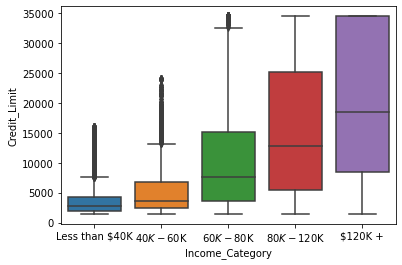

<IPython.core.display.Javascript object>

In [18]:
# Cat+Numeric
sns.boxplot(
    data["Income_Category"],
    data["Credit_Limit"],
    order=["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"],
)

In [19]:
data["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

<IPython.core.display.Javascript object>

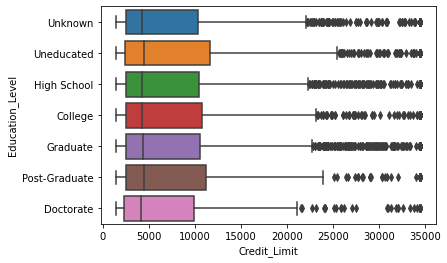

<IPython.core.display.Javascript object>

In [20]:
sns.boxplot(
    y=data["Education_Level"],
    x=data["Credit_Limit"],
    order=[
        "Unknown",
        "Uneducated",
        "High School",
        "College",
        "Graduate",
        "Post-Graduate",
        "Doctorate",
    ],
)

In [21]:
data["Credit_Limit"].value_counts()

1438.3     468
34516.0    467
15987.0     18
9959.0      18
23981.0     12
          ... 
18177.0      1
17999.0      1
21718.0      1
5987.0       1
9735.0       1
Name: Credit_Limit, Length: 5608, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<IPython.core.display.Javascript object>

In [23]:
data = data[
    [
        "Customer_Age",
        "Gender",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
        "Months_on_book",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
    ]
]

<IPython.core.display.Javascript object>

In [24]:
NumericColumns = data.select_dtypes("number").columns

<IPython.core.display.Javascript object>

In [25]:
Data = pd.get_dummies(data)

<IPython.core.display.Javascript object>

In [26]:
UnscaledData = Data.copy()

<IPython.core.display.Javascript object>

In [27]:
Data.describe().round(2)

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,...,9015.00,9015.00,9015.0,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00,9015.00
mean,46.33,35.95,2.34,2.45,8522.83,1168.70,7354.13,0.76,4419.12,64.69,...,0.07,0.08,0.2,0.16,0.17,0.40,0.93,0.01,0.00,0.06
std,7.93,7.92,1.01,1.11,9132.70,813.06,9135.28,0.22,3450.98,23.68,...,0.26,0.27,0.4,0.36,0.38,0.49,0.25,0.11,0.04,0.23
min,26.00,13.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,41.00,32.00,2.00,2.00,2505.50,466.00,1240.00,0.63,2118.00,44.00,...,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,46.00,36.00,2.00,2.00,4331.00,1281.00,3276.00,0.74,3868.00,67.00,...,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,52.00,40.00,3.00,3.00,10808.00,1783.50,9574.00,0.86,4743.50,81.00,...,0.00,0.00,0.0,0.00,0.00,1.00,1.00,0.00,0.00,0.00
max,73.00,56.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

In [28]:
scaler = StandardScaler()
Data[NumericColumns] = scaler.fit_transform(Data[NumericColumns])
Data.head()

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.167938,0.384946,-1.329784,0.492457,0.456425,-0.481790,0.499177,2.619726,-0.949093,-0.958037,...,0,0,0,1,0,0,1,0,0,0
1,0.336254,1.015999,-1.329784,-0.410247,-0.029219,-0.374781,0.004146,3.557176,-0.906494,-1.338094,...,0,0,0,0,0,1,1,0,0,0
2,0.588351,0.006314,-1.329784,-2.215655,-0.558993,-1.437487,-0.430895,8.349096,-0.733780,-1.887065,...,0,0,0,0,1,0,1,0,0,0
3,-0.798179,-0.246107,1.653790,-1.312951,-0.570491,1.658383,-0.717931,2.938277,-0.941269,-1.887065,...,1,0,0,0,0,1,1,0,0,0
4,-0.798179,-1.886846,-1.329784,-2.215655,-0.416859,-1.437487,-0.288801,6.442339,-1.044144,-1.549237,...,0,0,0,1,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    9015 non-null   float64
 1   Months_on_book                  9015 non-null   float64
 2   Months_Inactive_12_mon          9015 non-null   float64
 3   Contacts_Count_12_mon           9015 non-null   float64
 4   Credit_Limit                    9015 non-null   float64
 5   Total_Revolving_Bal             9015 non-null   float64
 6   Avg_Open_To_Buy                 9015 non-null   float64
 7   Total_Amt_Chng_Q4_Q1            9015 non-null   float64
 8   Total_Trans_Amt                 9015 non-null   float64
 9   Total_Trans_Ct                  9015 non-null   float64
 10  Total_Ct_Chng_Q4_Q1             9015 non-null   float64
 11  Avg_Utilization_Ratio           9015 non-null   float64
 12  Gender_F                        9

<IPython.core.display.Javascript object>

In [30]:
Data1 = Data.iloc[:, :-1]

<IPython.core.display.Javascript object>

In [31]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    9015 non-null   float64
 1   Months_on_book                  9015 non-null   float64
 2   Months_Inactive_12_mon          9015 non-null   float64
 3   Contacts_Count_12_mon           9015 non-null   float64
 4   Credit_Limit                    9015 non-null   float64
 5   Total_Revolving_Bal             9015 non-null   float64
 6   Avg_Open_To_Buy                 9015 non-null   float64
 7   Total_Amt_Chng_Q4_Q1            9015 non-null   float64
 8   Total_Trans_Amt                 9015 non-null   float64
 9   Total_Trans_Ct                  9015 non-null   float64
 10  Total_Ct_Chng_Q4_Q1             9015 non-null   float64
 11  Avg_Utilization_Ratio           9015 non-null   float64
 12  Gender_F                        9

<IPython.core.display.Javascript object>

# AgglomerativeClustering

In [32]:
DisMetrics = pd.DataFrame(gower.gower_matrix(Data))

<IPython.core.display.Javascript object>

In [33]:
DisMetrics.shape

(9015, 9015)

<IPython.core.display.Javascript object>

In [34]:
clst1 = AgglomerativeClustering(
    n_clusters=3, linkage="complete", affinity="precomputed"
)
clst1.fit(DisMetrics)

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=3)

<IPython.core.display.Javascript object>

In [35]:
silhouette_score(DisMetrics, clst1.labels_, metric="precomputed")

0.25163013

<IPython.core.display.Javascript object>


* `n_clusters=2` -> silhoette_score is `0.266`
* `n_clusters=3` -> silhoette_score is `0.251`
* `n_clusters=4` -> silhoette_score is `0.148`

Based on further analysis of the groups, for this research, I choose number of cluster to be 3. 


In [36]:
Data["label"] = clst1.labels_
Data["label"] = "Cluster: " + Data["label"].astype(str)
Data["label"].value_counts()

Cluster: 0    4759
Cluster: 1    4149
Cluster: 2     107
Name: label, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
UnscaledData["label"] = clst1.labels_
UnscaledData["label"] = "Cluster: " + UnscaledData["label"].astype(str)
UnscaledData["label"].value_counts()

Cluster: 0    4759
Cluster: 1    4149
Cluster: 2     107
Name: label, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
clst_avgs = UnscaledData.groupby("label").mean()
clst_avgs.style.background_gradient()

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster: 0,46.370876,35.961967,2.345661,2.425930,3937.066022,1150.637319,2786.428704,0.754676,4304.563984,65.660853,0.714291,0.366642,0.891784,0.108216,0.091406,0.040765,0.326539,0.202143,0.046438,0.142257,0.150452,0.067871,0.471318,0.385375,0.075436,0.000000,0.303215,0.000000,0.000000,0.696785,0.967430,0.004623,0.000841,0.027107
Cluster: 1,46.300072,35.939503,2.334297,2.490962,13534.263967,1190.513618,12343.750349,0.764772,4504.446132,63.327308,0.708881,0.189625,0.000000,1.000000,0.110629,0.043625,0.291637,0.194746,0.058809,0.147023,0.153531,0.077368,0.462280,0.389009,0.071342,0.175223,0.058086,0.337913,0.369969,0.058809,0.912750,0.018077,0.002651,0.066522
Cluster: 2,45.869159,35.822430,2.065421,2.308411,18160.719626,1126.560748,17034.158879,0.755159,6205.570093,74.093458,0.692009,0.062626,0.504673,0.495327,0.102804,0.056075,0.299065,0.168224,0.037383,0.140187,0.196262,0.102804,0.308411,0.476636,0.112150,0.000000,0.990654,0.000000,0.000000,0.009346,0.000000,0.093458,0.000000,0.906542


<IPython.core.display.Javascript object>

* Cluster 0 : Comparing to other Clusters; 
    * The least: Credit_Limit; Avg_Open_To_Buy; Total_Trans_Amt; Marital_Status_Divorced or Single; 
    * The most: Customer_Age; Months_on_book; Months_Inactive_12_mon; Total_Ct_Chng_Q4_Q1;Avg_Utilization_Ratio; Gender_F; Education_Level_Graduate or High School; Marital_Status_Married; Income_Category_Less than \\$40K;	Card_Category_Blue		
* Cluster 1 : Comparing to other Clusters; 
    * The least: Total_Trans_Ct; Education_Level_Graduate	
    * The most: Contacts_Count_12_mon; Total_Revolving_Bal	; Total_Amt_Chng_Q4_Q1; All men; Education_Level_College or Post_Graduate or Uneducated; Income_Category_\\$120K + or 60𝐾− 80K or 80𝐾− 120K; Card_Category_Platinum.
* Cluster 2 : Comparing to other Clusters; 
    * The least: customer age; Months_on_book; Months_Inactive_12_mon; Contacts_Count_12_mon; Total_Revolving_Bal; Total_Amt_Chng_Q4_Q1; Avg_Utilization_Ratio; Education_Level_High School or Post-Graduate or Uneducated; Marital_Status_Married;    
    * The most: Credit_Limit; Avg_Open_To_Buy; Total_Trans_Amt; Total_Trans_Ct; Education_Level_Doctorate;  Marital_Status_Divorced or Single; Income_Category_ 40𝐾− 60K; Card_Category_Gold or Silver

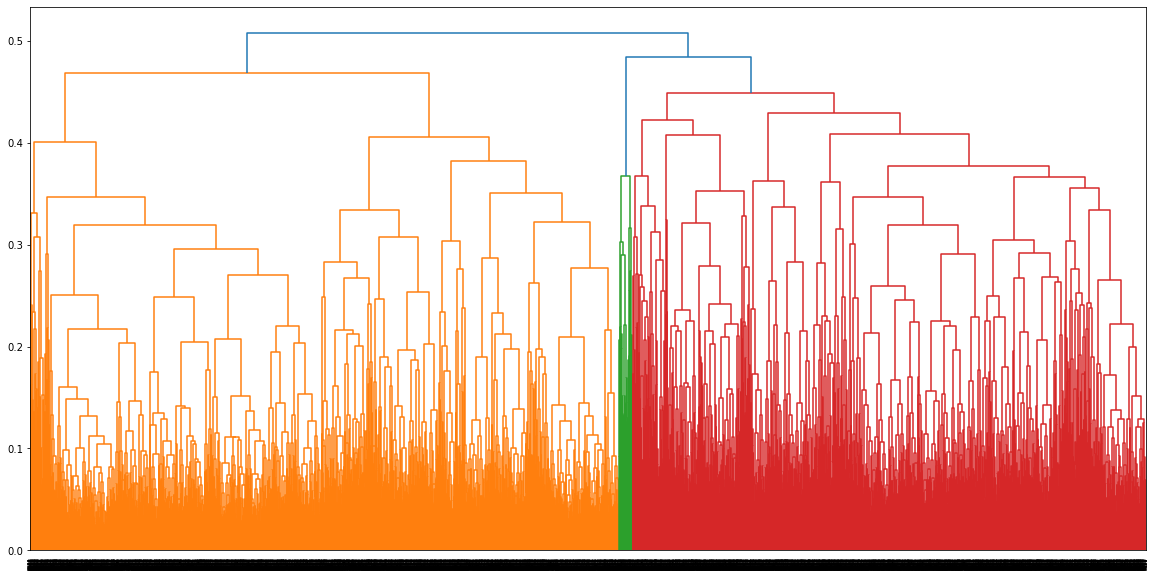

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(squareform(DisMetrics), method="complete"), color_threshold=0.48)
plt.show()

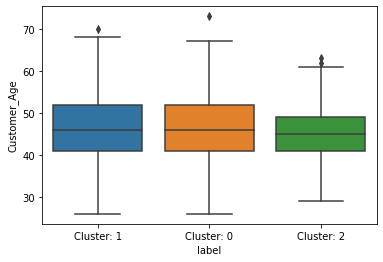

<IPython.core.display.Javascript object>

In [44]:
sns.boxplot(x="label", y="Customer_Age", data=UnscaledData)

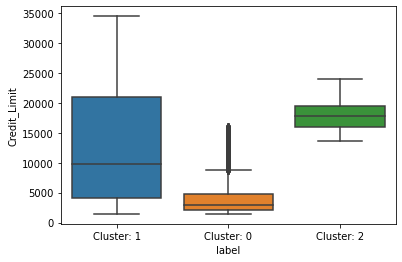

<IPython.core.display.Javascript object>

In [45]:
sns.boxplot(x="label", y="Credit_Limit", data=UnscaledData)

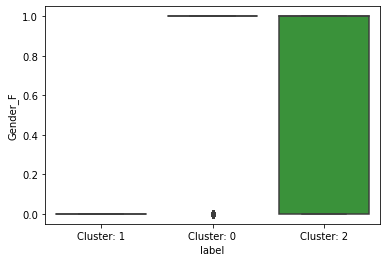

<IPython.core.display.Javascript object>

In [46]:
sns.boxplot(x="label", y="Gender_F", data=UnscaledData)

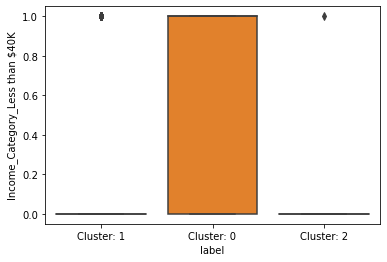

<IPython.core.display.Javascript object>

In [47]:
sns.boxplot(x="label", y="Income_Category_Less than $40K", data=UnscaledData)

In [48]:
data["label"] = UnscaledData["label"]

<IPython.core.display.Javascript object>

In [49]:
pd.crosstab(
    index=data["label"], columns=data["Education_Level"], normalize="columns"
).style.background_gradient()

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
label,,,,,,,
Cluster: 0,0.480663,0.509186,0.555794,0.538031,0.471215,0.519969,0.521106
Cluster: 1,0.507182,0.475066,0.432761,0.451902,0.520256,0.468510,0.463610
Cluster: 2,0.012155,0.015748,0.011445,0.010067,0.008529,0.011521,0.015284


<IPython.core.display.Javascript object>

# DBSCAN

In [50]:
clst2 = DBSCAN(eps=0.04, min_samples=10, metric="precomputed")
clst2.fit(DisMetrics)

DBSCAN(eps=0.04, metric='precomputed', min_samples=10)

<IPython.core.display.Javascript object>

In [51]:
UnscaledData["label"] = clst2.labels_
UnscaledData["label"] = "Cluster: " + UnscaledData["label"].astype(str)
UnscaledData["label"].value_counts()

Cluster: -1    3193
Cluster: 1      466
Cluster: 3      380
Cluster: 17     279
Cluster: 9      226
               ... 
Cluster: 67       9
Cluster: 80       8
Cluster: 81       8
Cluster: 82       6
Cluster: 75       5
Name: label, Length: 85, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
dbscan_clusters = UnscaledData[UnscaledData["label"] != "Cluster: -1"]
dbscan_clusters["label"].value_counts()

Cluster: 1     466
Cluster: 3     380
Cluster: 17    279
Cluster: 9     226
Cluster: 31    224
              ... 
Cluster: 78      9
Cluster: 80      8
Cluster: 81      8
Cluster: 82      6
Cluster: 75      5
Name: label, Length: 84, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
clst_avgs = dbscan_clusters.groupby("label").mean()
clst_avgs.style.background_gradient()

<IPython.core.display.Javascript object>

In [54]:
clst2.labels_.max()

83

<IPython.core.display.Javascript object>

In [55]:
silhouette_score(DisMetrics, clst2.labels_, metric="precomputed")

0.073750645

<IPython.core.display.Javascript object>

Dbscan is not a good cluster here because, it consider more data as outliers. I changed eps and cluster numbers but doesnt work. Also, by changing number of clusters silhouette score does not help based on a reasonble number of clusters and the score were less than Hierartical silhouette score.